In [2]:
import pandas as pd
from scipy.stats.mstats import winsorize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. 결측치 전, 후 정상 부도 기업 분포 한번에 비교 displot + boxplot
2. describe().T.to_csv
3. min, std 각각 QQ plot 보내주기

## 이상치 처리 전 분포

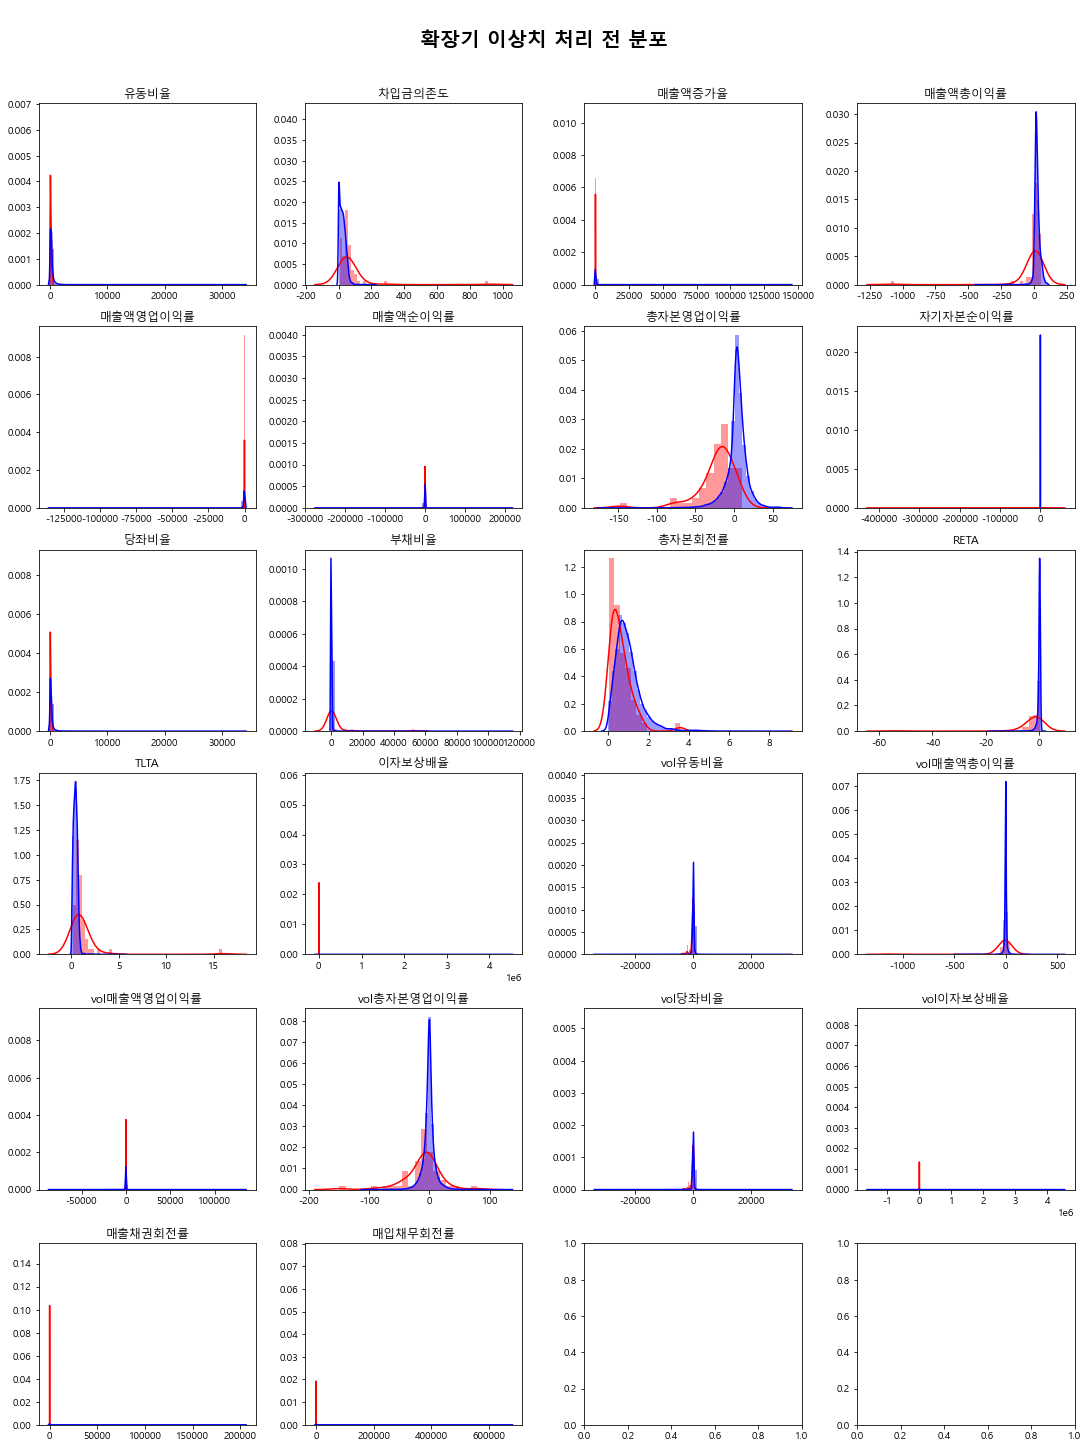

In [5]:
expansion_normal = pd.read_csv('../Data/NA/expansion_normal.csv',encoding='cp949')
expansion_default = pd.read_csv('../Data/NA/expansion_default.csv',encoding='cp949')

#F테스트-t테스트로 뽑은 유의한 변수 (확장기:22개, 수축기:26개)
select_min =['유동비율', '차입금의존도', '매출액증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률',
             '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', 'RETA', 'TLTA', '이자보상배율', 
             'vol유동비율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol이자보상배율', 
             '매출채권회전률', '매입채무회전률',]

normal = expansion_normal[select_min]
default = expansion_default[select_min]


fig, axes = plt.subplots(nrows = 6, ncols = 4,figsize=(15, 20),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 



for ax, col in zip(axes, normal.columns):
    sns.distplot(default[col], ax = ax,color='red')    
    sns.distplot(normal[col], ax = ax,color='blue')
    ax.set(xlabel="", ylabel="")
    ax.set_title(col)
    fig.suptitle('\n확장기 이상치 처리 전 분포\n', fontsize=20,fontweight='bold')

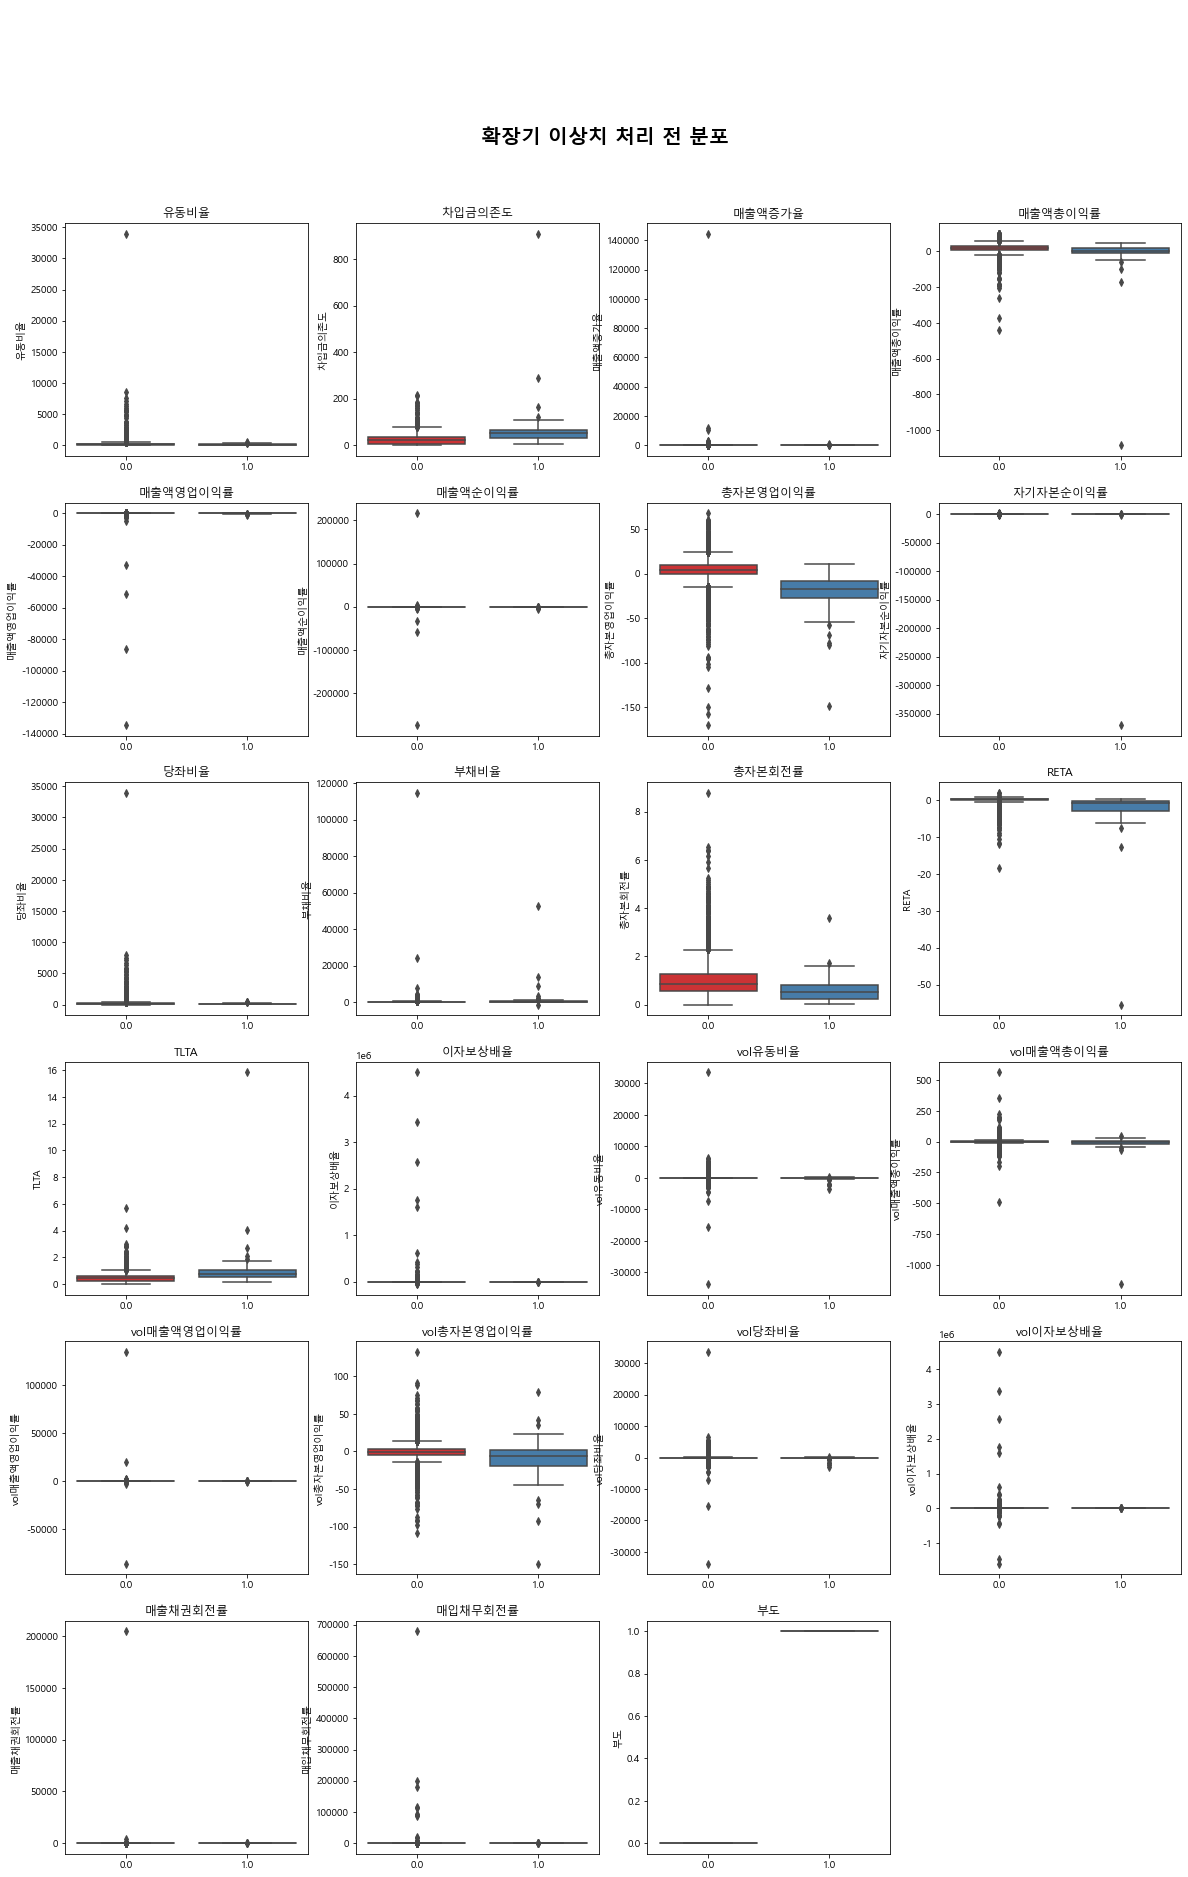

In [14]:
expansion_normal = pd.read_csv('../Data/NA/expansion_normal.csv',encoding='cp949')
expansion_default = pd.read_csv('../Data/NA/expansion_default.csv',encoding='cp949')

#F테스트-t테스트로 뽑은 유의한 변수 (확장기:22개, 수축기:26개)
select_min =['유동비율', '차입금의존도', '매출액증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률',
             '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', 'RETA', 'TLTA', '이자보상배율', 
             'vol유동비율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol이자보상배율', 
             '매출채권회전률', '매입채무회전률','부도']


normal = expansion_normal[select_min]
default = expansion_default[select_min]

expansion = pd.concat([normal,default],axis=0)

    
plt.figure(figsize=(20,30))
for idx, col in enumerate(select_min):
    plt.subplot(6,4,idx+1)
    sns.boxplot(x=expansion['부도'],y=expansion[col],data=expansion,palette='Set1') #hue='부도'
    plt.xlabel('')
    plt.title('')
    plt.title(select_min[idx])   
    plt.rcParams['font.family'] =  'Malgun Gothic'    
    plt.suptitle('\n\n\n\n\n확장기 이상치 처리 전 분포', fontsize=20,fontweight='bold')
    
    

In [24]:
normal.describe().T.to_csv('../Data/NA/expansion_normal_before_winsorize.csv',encoding='cp949')

In [25]:
default.describe().T.to_csv('../Data/NA/expansion_default_before_winsorize.csv',encoding='cp949')

## 이상치 처리 후 분포 (Winsorizing)

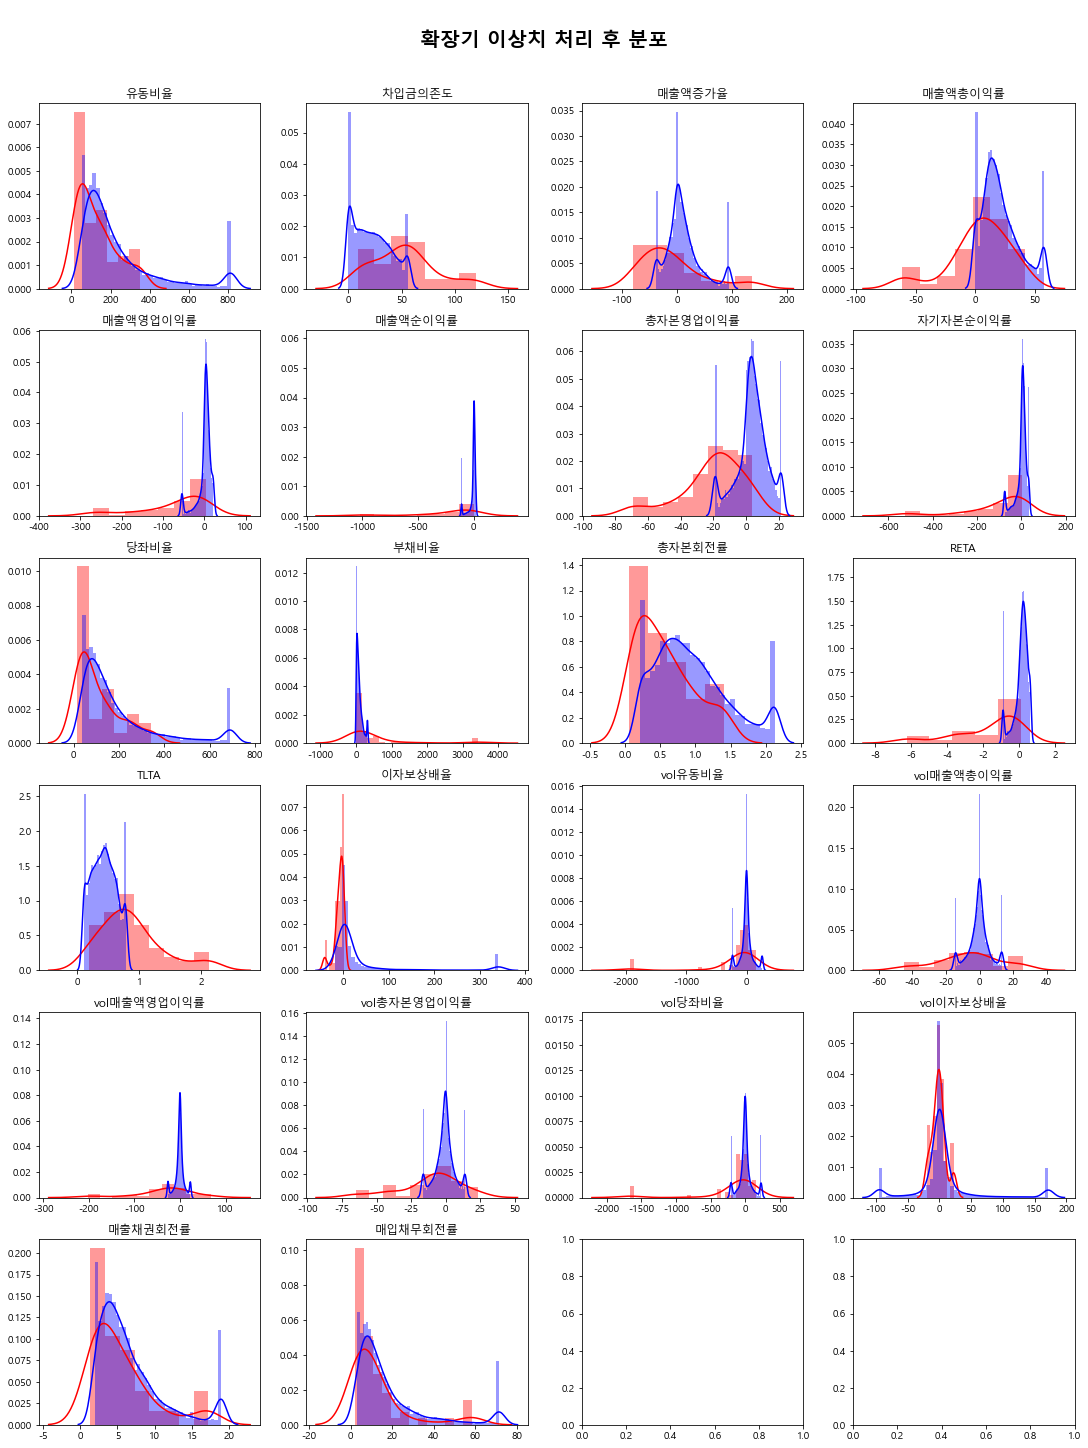

In [15]:
expansion_normal_win = pd.read_csv('../Data/WIN/expansion_normal_win.csv',encoding='cp949')
expansion_default_win = pd.read_csv('../Data/WIN/expansion_default_win.csv',encoding='cp949')


#F테스트-t테스트로 뽑은 유의한 변수 (확장기:22개, 수축기:26개)
select_min =['유동비율', '차입금의존도', '매출액증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률',
             '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', 'RETA', 'TLTA', '이자보상배율', 
             'vol유동비율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol이자보상배율', 
             '매출채권회전률', '매입채무회전률',]

normal_win = expansion_normal_win[select_min]
default_win = expansion_default_win[select_min]


fig, axes = plt.subplots(nrows = 6, ncols = 4,figsize=(15, 20),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 



for ax, col in zip(axes, normal_win.columns):
    sns.distplot(default_win[col], ax = ax,color='red')    
    sns.distplot(normal_win[col], ax = ax,color='blue')
    ax.set(xlabel="", ylabel="")
    ax.set_title(col)
    fig.suptitle('\n확장기 이상치 처리 후 분포\n', fontsize=20,fontweight='bold')
    

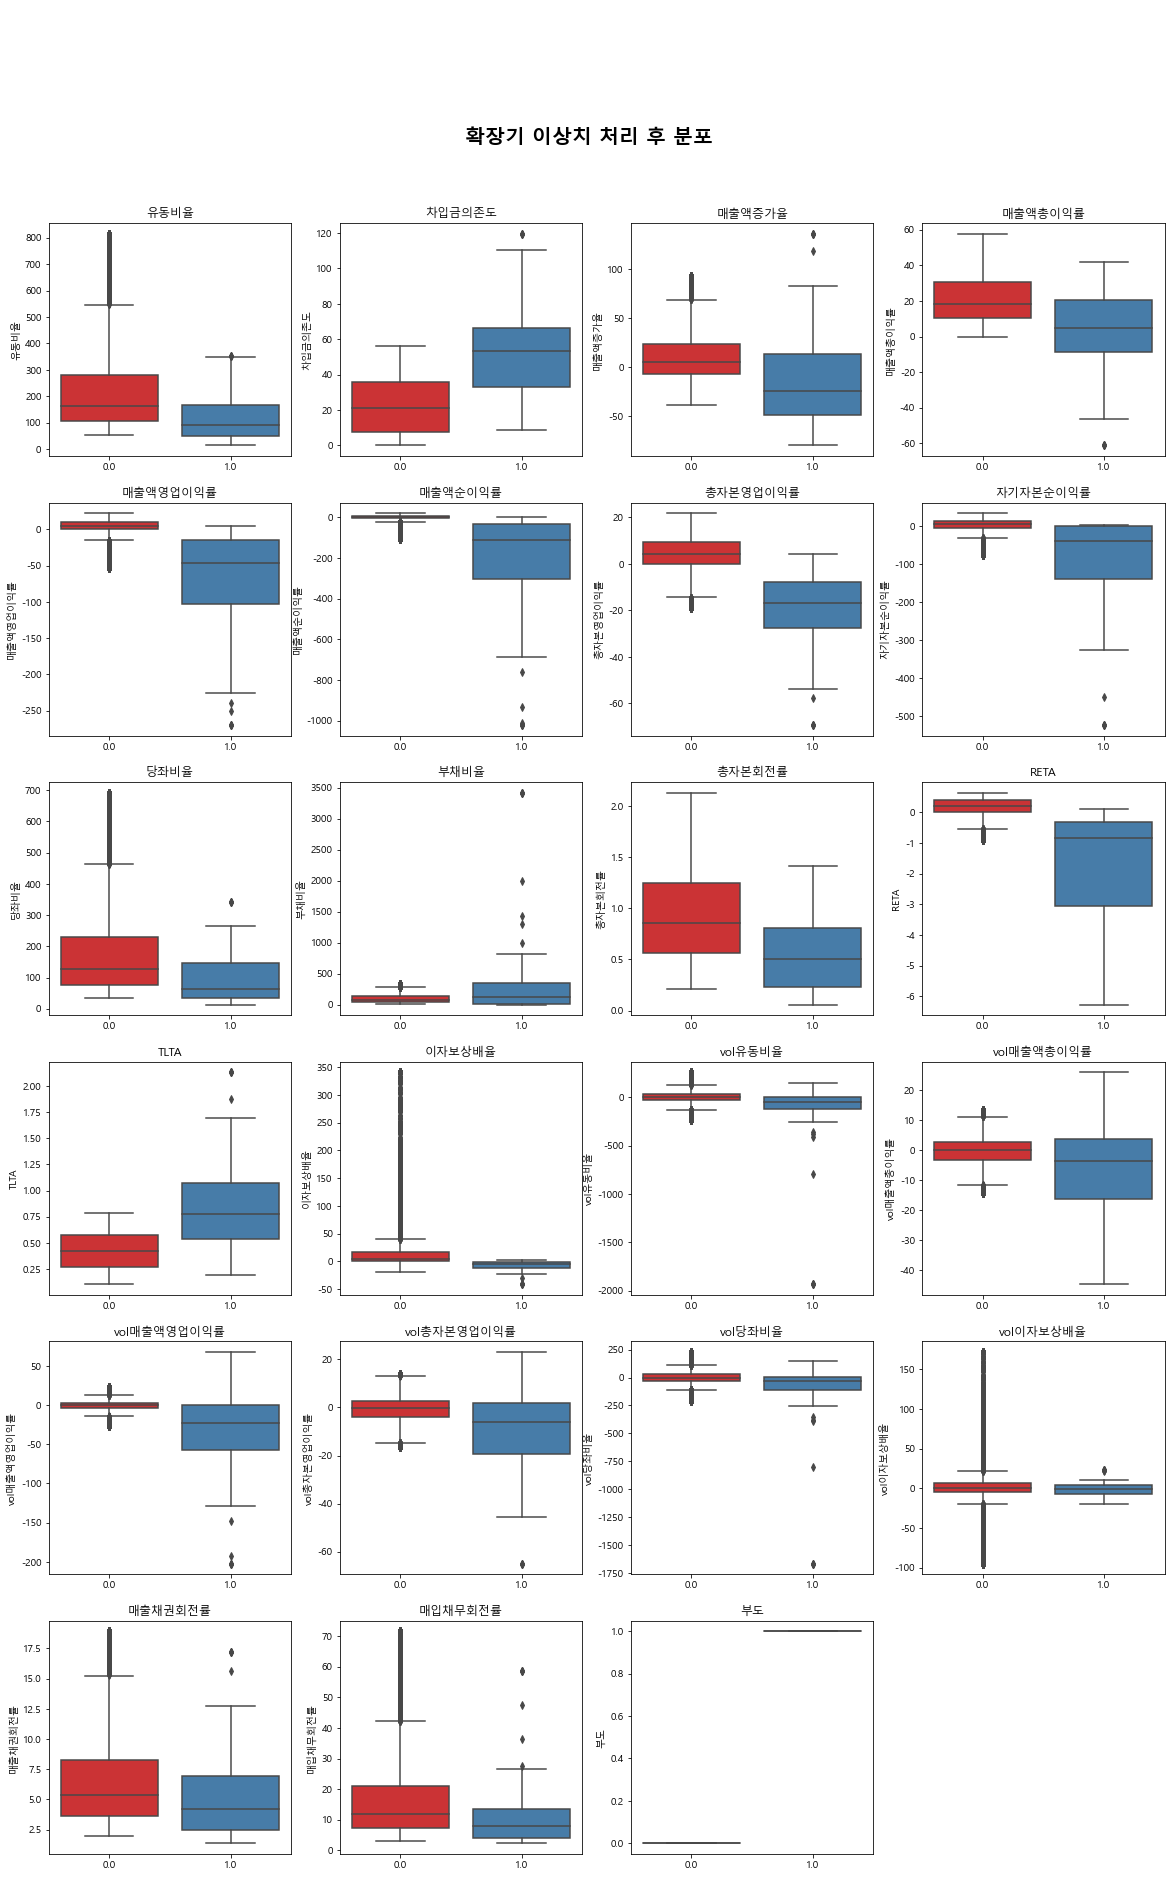

In [16]:
expansion_normal_win = pd.read_csv('../Data/WIN/expansion_normal_win.csv',encoding='cp949')
expansion_default_win = pd.read_csv('../Data/WIN/expansion_default_win.csv',encoding='cp949')

#F테스트-t테스트로 뽑은 유의한 변수 (확장기:22개, 수축기:26개)
select_min =['유동비율', '차입금의존도', '매출액증가율', '매출액총이익률', '매출액영업이익률', '매출액순이익률',
             '총자본영업이익률', '자기자본순이익률', '당좌비율', '부채비율', '총자본회전률', 'RETA', 'TLTA', '이자보상배율', 
             'vol유동비율', 'vol매출액총이익률', 'vol매출액영업이익률', 'vol총자본영업이익률', 'vol당좌비율', 'vol이자보상배율', 
             '매출채권회전률', '매입채무회전률','부도']

normal_win = expansion_normal_win[select_min]
default_win = expansion_default_win[select_min]

expansion = pd.concat([normal_win,default_win],axis=0)

    
    
plt.figure(figsize=(20,30))
for idx, col in enumerate(select_min):
    plt.subplot(6,4,idx+1)
    sns.boxplot(x=expansion['부도'],y=expansion[col],data=expansion,palette='Set1')
    plt.title(select_min[idx])
    plt.xlabel('')
    plt.rcParams['font.family'] =  'Malgun Gothic'    
    plt.suptitle('\n\n\n\n\n확장기 이상치 처리 후 분포', fontsize=20,fontweight='bold')
    

In [26]:
normal_win.describe().T.to_csv('../Data/WIN/expansion_normal_after_winsorize.csv',encoding='cp949')

In [27]:
default_win.describe().T.to_csv('../Data/WIN/expansion_default_after_winsorize.csv',encoding='cp949')

## Scaling (MinMax)

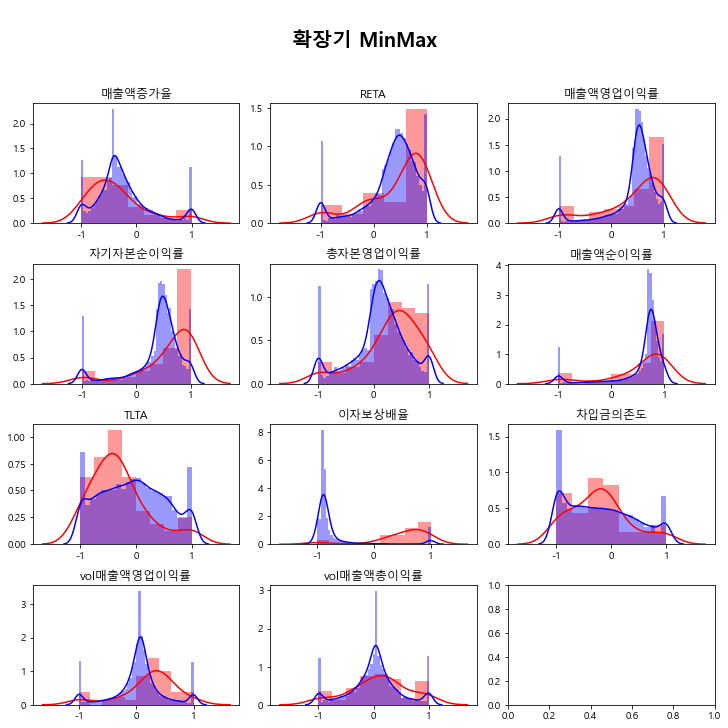

In [17]:
expansion_normal_win = pd.read_csv('../Data/WIN/expansion_normal_win.csv',encoding='cp949')
expansion_default_win = pd.read_csv('../Data/WIN/expansion_default_win.csv',encoding='cp949')


# MinMax 상관계수 거르기 전 변수 리스트 
select_min =['매출액증가율','RETA','매출액영업이익률','자기자본순이익률','총자본영업이익률','매출액순이익률',
             'TLTA','이자보상배율','차입금의존도','vol매출액영업이익률','vol매출액총이익률']

normal_win = expansion_normal_win[select_min]
default_win= expansion_default_win[select_min]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1)) 
normal_win_min=scaler.fit_transform(normal_win)
default_win_min= scaler.fit_transform(default_win)
normal_win_min = pd.DataFrame(normal_win_min,columns=normal_win.columns)
default_win_min = pd.DataFrame(default_win_min,columns=default_win.columns)

fig, axes = plt.subplots(nrows = 4, ncols = 3,figsize=(10, 10),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 



for ax, col in zip(axes, normal_win_min.columns):
    sns.distplot(default_win_min[col], ax = ax,color='red')    
    sns.distplot(normal_win_min[col], ax = ax,color='blue')
    ax.set(xlabel="", ylabel="")
    ax.set_title(col)
    fig.suptitle('\n확장기 MinMax\n', fontsize=20,fontweight='bold')
    

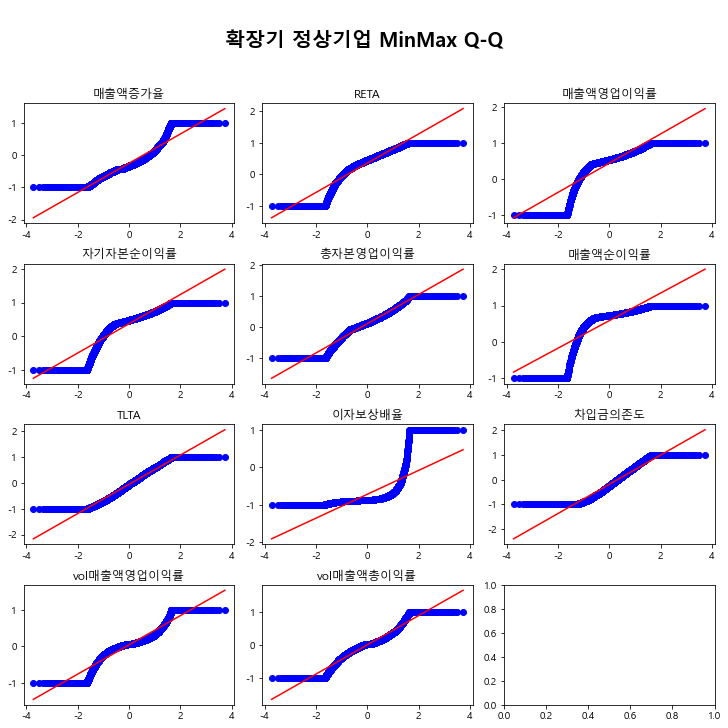

In [19]:
import scipy.stats as stats
fig, axes = plt.subplots(nrows = 4, ncols =3,figsize=(10, 10),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 

for ax, col in zip(axes, normal_win_min.columns):
  stats.probplot(normal_win_min[col], plot = ax)
  ax.set(xlabel="", ylabel="")
  ax.set_title(col)
  fig.suptitle('\n확장기 정상기업 MinMax Q-Q\n', fontsize=20,fontweight='bold')
  

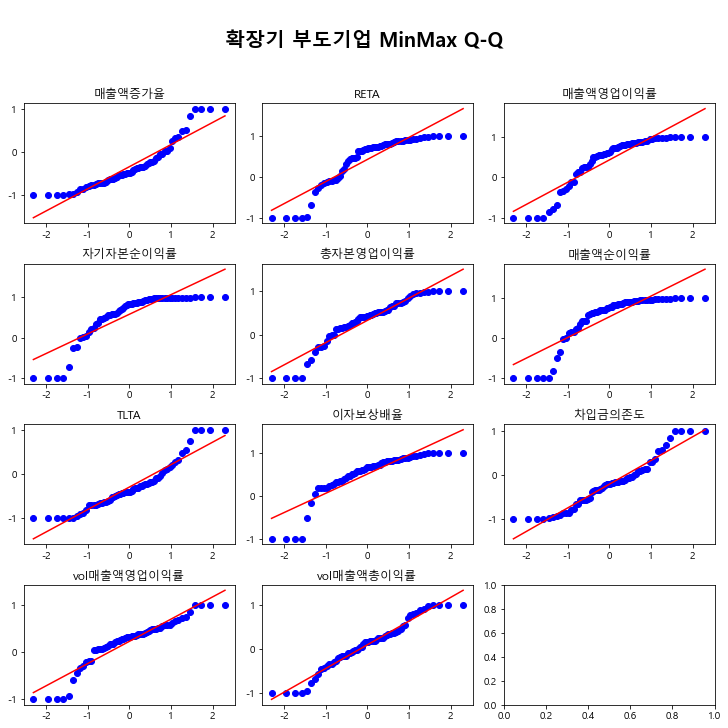

In [20]:
import scipy.stats as stats
fig, axes = plt.subplots(nrows = 4, ncols =3,figsize=(10, 10),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 

for ax, col in zip(axes, default_win_min.columns):
  stats.probplot(default_win_min[col], plot = ax)
  ax.set(xlabel="", ylabel="")
  ax.set_title(col)
  fig.suptitle('\n확장기 부도기업 MinMax Q-Q\n', fontsize=20,fontweight='bold')
  

## Scaling (Standard)

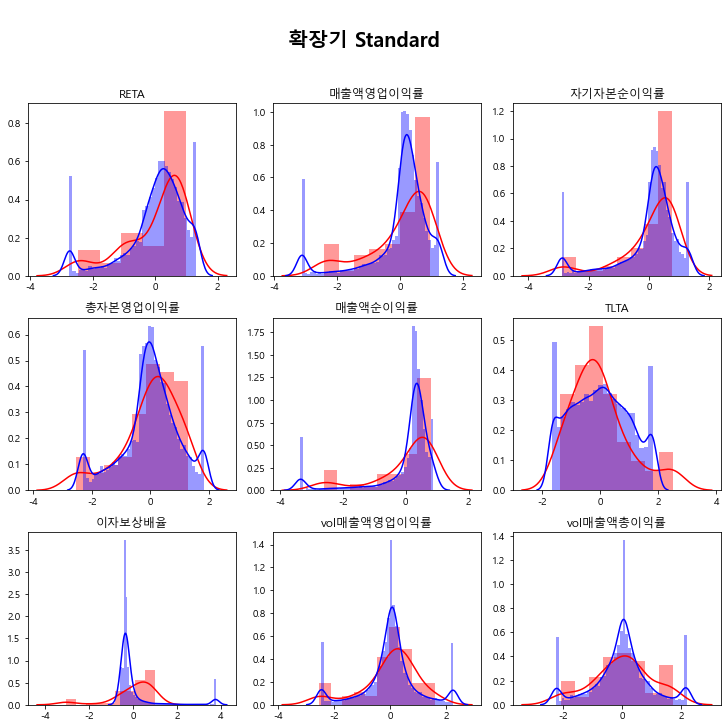

In [21]:
expansion_normal_win = pd.read_csv('../Data/WIN/expansion_normal_win.csv',encoding='cp949')
expansion_default_win = pd.read_csv('../Data/WIN/expansion_default_win.csv',encoding='cp949')


# Standard 상관계수 거르기 전 변수 리스트 
select_std = ['RETA','매출액영업이익률','자기자본순이익률','총자본영업이익률','매출액순이익률',
              'TLTA','이자보상배율','vol매출액영업이익률','vol매출액총이익률']
normal_win = expansion_normal_win[select_std]
default_win= expansion_default_win[select_std]


from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
normal_win_std=scaler.fit_transform(normal_win)
default_win_std= scaler.fit_transform(default_win)
normal_win_std = pd.DataFrame(normal_win_std,columns=normal_win.columns)
default_win_std = pd.DataFrame(default_win_std,columns=default_win.columns)

fig, axes = plt.subplots(nrows = 3, ncols = 3,figsize=(10, 10),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 



for ax, col in zip(axes, normal_win_std.columns):
    sns.distplot(default_win_std[col], ax = ax,color='red')    
    sns.distplot(normal_win_std[col], ax = ax,color='blue')
    ax.set(xlabel="", ylabel="")
    ax.set_title(col)
    fig.suptitle('\n확장기 Standard\n', fontsize=20,fontweight='bold')
    

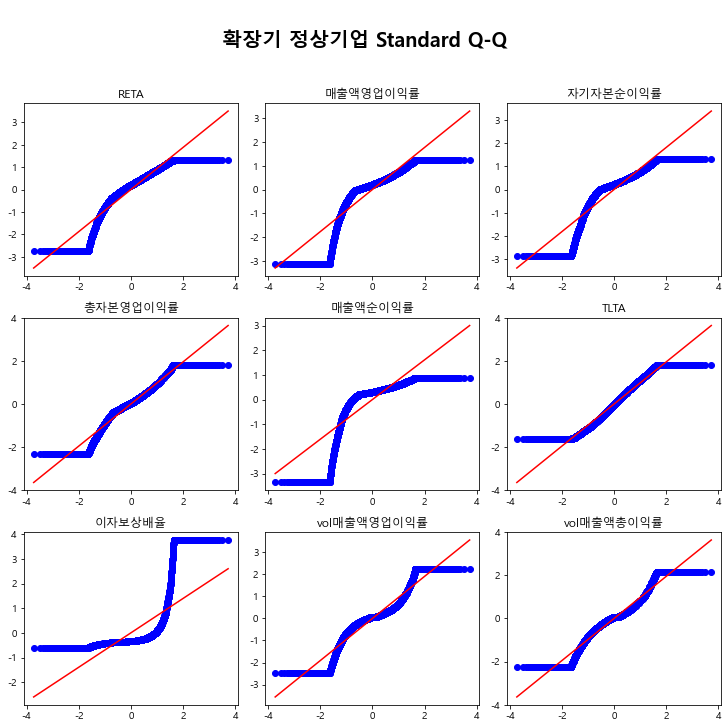

In [22]:
import scipy.stats as stats
fig, axes = plt.subplots(nrows = 3, ncols =3,figsize=(10, 10),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 

for ax, col in zip(axes, normal_win_std.columns):
  stats.probplot(normal_win_std[col], plot = ax)
  ax.set(xlabel="", ylabel="")
  ax.set_title(col)
  fig.suptitle('\n확장기 정상기업 Standard Q-Q\n', fontsize=20,fontweight='bold')
  

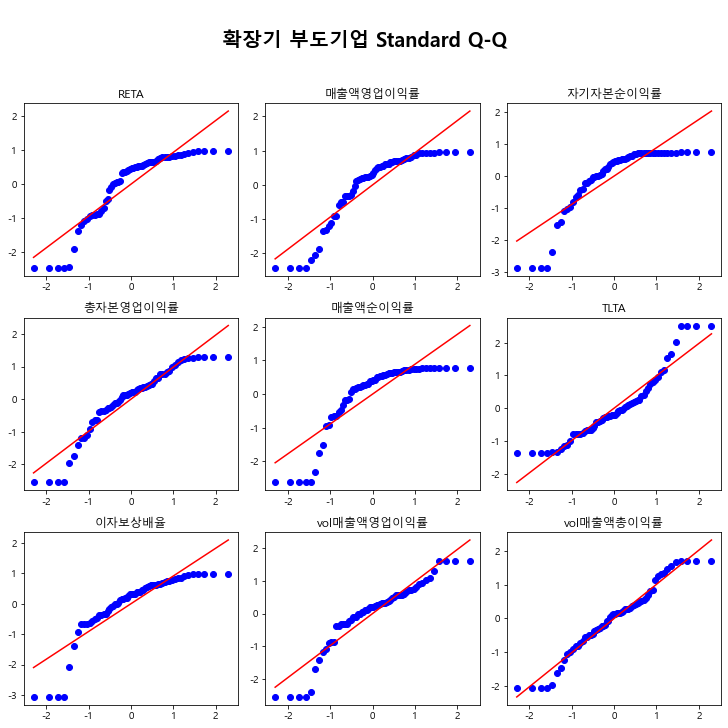

In [23]:
import scipy.stats as stats
fig, axes = plt.subplots(nrows = 3, ncols =3,figsize=(10, 10),constrained_layout=True)   
axes = axes.flatten()         # Convert axes to 1d array of length 9
# fig.set_size_inches(1, 15) #비율로 figsize 조정 

for ax, col in zip(axes, default_win_std.columns):
  stats.probplot(default_win_std[col], plot = ax)
  ax.set(xlabel="", ylabel="")
  ax.set_title(col)
  fig.suptitle('\n확장기 부도기업 Standard Q-Q\n', fontsize=20,fontweight='bold')
  